# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

<center>
<img 
     src="http://www2.famaf.unc.edu.ar/~efernandez/egeo/img/logos/famaf.jpg" 
     alt="Drawing" 
     style="width:30%;"
/>
</center>

# Universidad Nacional de Córdoba
---

### Importación de librerías

In [1]:
import warnings
import datetime
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBClassifier

from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.impute import SimpleImputer

from pandas.plotting import lag_plot

import pyarrow
import fastparquet

import statsmodels

### Lectura del dataset 

In [2]:
df = pd.read_parquet('df_supervisado_agrupado.parquet')
df

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_1,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado
0,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72
1,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61
2,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46
3,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34
4,000000b5aea2c9ea7cc155f6ebcef97f826,202012.0,47.0,229.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,000f0b73ebfa002a79a0642b82e87919904,202101.0,64.0,21.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11616.45
7406,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68
7407,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08
7408,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64


In [3]:
df.columns

Index(['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad',
       'client__antig', 'client__x0_Hombre', 'client__x0_Mujer',
       'client__x0_Sin Datos', 'client__x1_Sector_Educativo',
       'client__x1_Sector_Empleado_Comercio', 'client__x1_Sector_Financiero',
       'client__x1_Sector_No_Operativo', 'client__x1_Sector_Operativo',
       'client__x1_Sector_Salud', 'client__x1_Sector_Seguridad',
       'client__x1_Sector_Sin_Datos', 'client__x2_Casado', 'client__x2_Otros',
       'client__x2_Sin_datos', 'client__x2_Soltero', 'client__x3_REGION_CUYO',
       'client__x3_REGION_NORDESTE', 'client__x3_REGION_NOROESTE',
       'client__x3_REGION_PAMPEANA', 'client__x3_REGION_PATAGONIA',
       'client__x3_SIN_DATOS', 'trans__x0_AX', 'trans__x0_EX', 'trans__x0_MC',
       'trans__x0_PC', 'trans__x0_PL', 'trans__x0_PN', 'trans__x0_PP',
       'trans__x0_TA', 'trans__x0_VI', 'trans__x0_ZE',
       'trans__x1_American_express', 'trans__x1_Clasica',
       'trans__x1_Master_internacio

Ordenamos nuestro conjunto de datos en función a la variable anio_mes_cupon.

In [3]:
df = df.sort_values(by = ['anio_mes_cupon'], ascending = True)
df['o_mes'] = df.anio_mes_cupon.astype('category').cat.codes

df['monto_ajustado'].describe().round(2)

count      7410.00
mean      11808.44
std       14823.98
min      -14160.39
25%         987.78
50%        6373.59
75%       17248.53
max      134045.42
Name: monto_ajustado, dtype: float64

### Distribución de features numericas con respecto al target, monto_ajustado

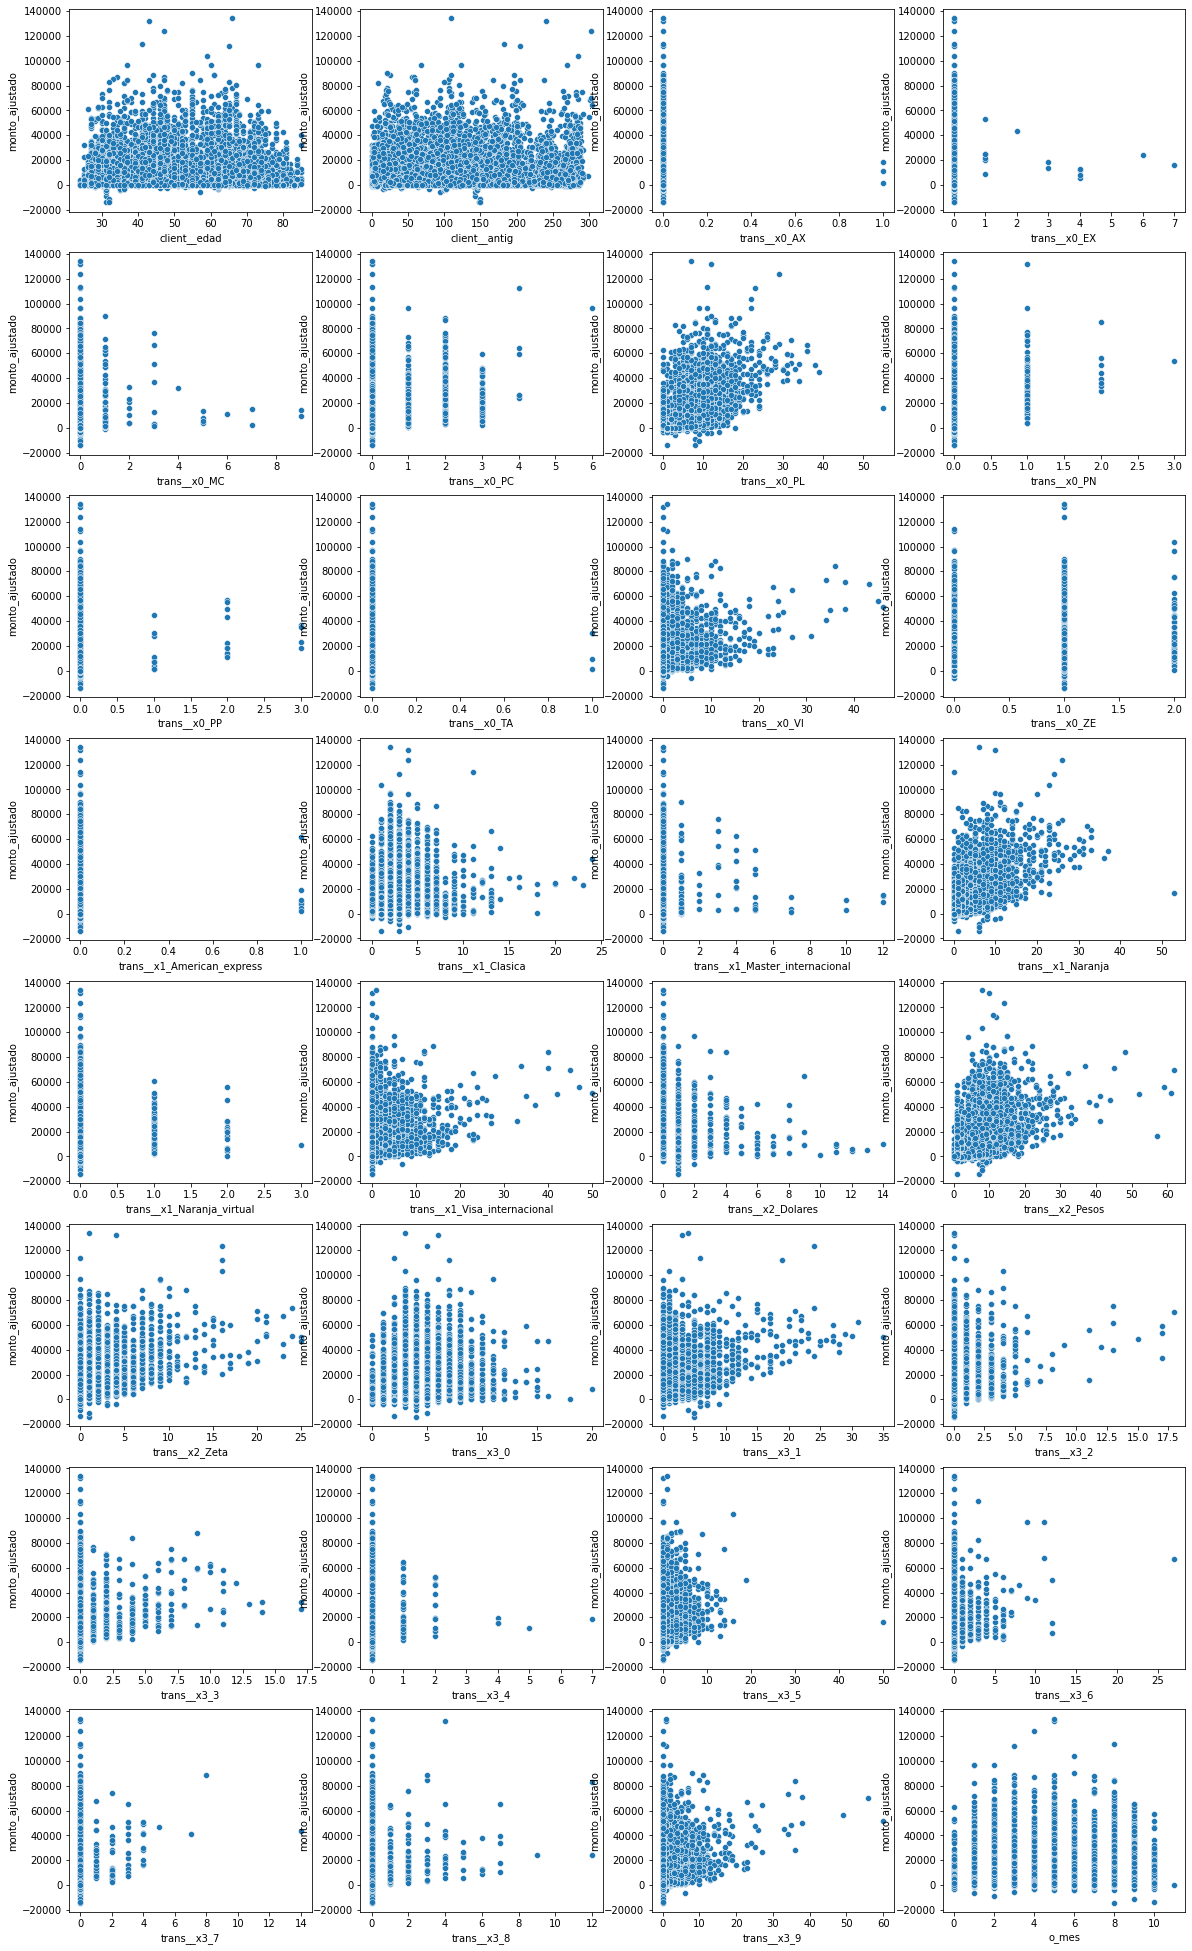

In [5]:
# Visualizamos solo las numericas y las transaccionales sumarizadas
cols = [x for x in df.columns.values if 'client__x' not in x]
cols.remove('dni_titular_movimiento')
cols.remove('anio_mes_cupon')
cols.remove('monto_ajustado')

# plot
n_cols = 4
n_rows = math.ceil(len(cols)/n_cols)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 35))
count = 0
for i in cols:    
    row = math.floor(count / n_cols)
    col = count % n_cols
    ax = axs[row, col]
    sns.scatterplot(data=df, x=i, y='monto_ajustado', ax=ax)
    count =count +1

plt.show()

### Distribuciones de monto_ajustado con respecto a otras variables numericas discretas

En el orden en que se ven en el grafico anterior, comenzando por el primero arriba a la izquierda

#### Datos del cliente
- *client__edad* (edad del cliente): La distribucion se asemeja a una uniforme, con un rango de montos mayoritariamente entre 0 y 50000. Hay una pendiente ascendente pronunciada entre 0 y 30 años y una descendente y menos pronunciada entre 65 y 100 aproximadamente. Esto nos indica que hay un rango etario mas chico a edades mas tempranas donde los gastos crecen, y un rango mas grande a edades mas tardias donde los gastos decrecen.
- *client__antig* (Antiguedad del cliente): Similar a edad, la distribucion se asemeja a una uniforme con un rango de montos mayoritariamente entre 0 y 50000. Este rango de montos se mantiene constante para casi todas las antiguedades presentes, excepto un rango entre 200 y 250 aproximadamente donde se puede observar una leve baja en el rango de montos. Es interesante de estudiar, ya que no habria una razon inmediata para pensar que ese particular rango de antiguedades deberia gastar menos que los otros. No deberiamos descartar tambien la posibilidad de que haya cierto sesgo.

#### Datos de la transacción
Para cada variable, el eje horizontal representa la cantidad de transacciones en esa categoria, para un solo mes. 
##### Producto Naranja
- *trans__x0_AX* (American Express): La mayoria de los clientes se concentran en 0 ya que es un producto muy poco usado. 
- *trans__x0_EX* (Extraccion cajeros Nac.): Mismo caso que AX, con algunos casos con mas frecuencia de uso en un solo mes. 
- *trans__x0_MC* (Master Card): Mismo caso que EX
- *trans_x0_PC* (Plan de Cuotas): Si bien muchos casos estan en 0, existe una mayor distribucion para 1, 2, y 3. Al tratarse de un plan de cuotas seria esperable que muchos clientes usen este producto en varios meses. 
- *trans_x0_PL* (Plan Largo): Es uno de los productos mas usados en el dataset. Se extiende mayoritariamente entre 0 y 30 usos mensuales. Entre 0 y 20 usos la distribucion parece ser uniforme, con un rango de gastos entre 0 y 60000. Puede verse una cierta tendencia a aumentar los gastos a medida que aumenta PL.
- *trans__x0_PN* (Prestamos Personales PN): La mayoria de los casos estan en 0, disminuyendo en cantidad para mayor PN.
- *trans__x0_PP* (Plan de Pago Propuesto): Similar a PN
- *trans__x0_TA* (Transfer Naranja Arg): Similar a PP
- *trans__x0_VI* (Visa): Similar a PL, reune un gran numero de transacciones del dataset, sin embargo no se distribuyen parecido. El mayor rango de montos se concentra cerca de 0 para VI, y a medida que este ultimo aumenta, el rango se acorta y queda aprox entre 0 y 40000 para un valor de ~12 para VI. Se podria decir que los montos tienden a disminuir para mayor cantidad de gastos en este producto. 
- *trans__x0_ZE* (Zeta Optada): Hay una cantidad similar de casos para 0 y 1, disminuyendo para 2.

##### Tipo Producto Naranja
- *trans__x1_American_express*: La mayoria de los dnis no tiene gastos con este tipo de producto
- *trans__x1_Clasica*: El rango de montos va entre 0 y 80000 aprox, con una pendiente corta pero abrupta entre 0 y ~3 y descendiendo a partir de ese valor, acortando el rango de montos. 
- *trans__x1_Master_Internacional*: Se puede ver una distribucion con un contorno parecido al caso de 'Clasica' pero con mayoria de casos concentrados en 0.
- *trans__x1_Naranja*: Es de los tipos de producto mas usados, con una distribucion parecida al producto PL. Esto nos dice que probablemente se comportan parecido y son parte de las mismas transacciones en muchos casos. 
- *trans__x1_Naranja_virtual*: Mayoria de casos en 0, disminuyendo para 1 y 2. 
- *trans__x1_Visa_internacional*: Se distribuye de manera parecida al producto VI. Similar al caso del tipo 'Naranja' y PL, podriamos estar viendo las mismas transacciones. 

##### Tipo de moneda
- *trans__x2_Dolares*: Las transacciones en dolares tienen su rango mas grande para las cantidades bajas de transacciones, y luego disminuye tanto en rango como en valor a medida que aumentan. 
- *trans__x3_Pesos*: Se puede ver una distribucion medianamente uniforme para un rango entre 0 y 60000 pesos, de 0 a 20 transacciones mensuales. Para valores mas grandes habria mayor dispersion tanto en montos como en cantidad de transacciones. Se distribuye de una manera similar a PL, esto se explica por la cantidad de gastos hechos en pesos y en producto PL, que son la mayoria. 
- *trans__x2_Zeta*: Si bien hay menos transacciones que en pesos, se puede observar como el rango de monto disminuye en tamaño pero estabilizandose en valores altos, mayores a 20000, para mas de 10 transacciones en moneda Zeta. 
- *trans__x3_0 (Comercios 0)*: Se distribuye similar a tipo producto 'Clasica' pero con una forma levemente mas alargada. Tiene una pendiente inicial, un pico, y luego un descenso de los gastos mas paulatino. El rango de los montos siempre con un piso en 0, cubriendo toda el area debajo del contorno de manera uniforme. 
- *trans__x3_1 (Comercios 1)*: Se distribuye similar a tipo producto 'Visa internacional', pero con una forma de 'piramide acostada' mas definida. El rango comienza entre 0 y ~90000 y disminuye con tendencia a estabilizarse cerca de 50000 para mayor cantidad de gastos en estos comercios. La distribucion de puntos es mas densa para valores entre 0 y ~13 en el eje horizontal.
- *trans__x3_2 (Comercios 2)*: Si bien hay menor cantidad de casos y la mayoria se concentran en 0, se puede decir que tiene una forma similar al caso de comercios 1.
- *trans__x3_3 (Comercios 3)*: Similar a Comercios 2 con una menor concentracion sobre el lado izquierdo del grafico. 
- *trans__x3_4 (Comercios 4)*: La mayoria de los casos se concentran en 0
- *trans__x3_5 (Comercios 5, 6, 7, 8)*: Similar a otras distribuciones ya vistas, hay un rango grande de montos para casos cercanos a 0, y se forma una especie de 'piramide acostada', cercana a estabilizar el rango centrandose cerca de 20000 para mas frecuencia de gastos en este comercio. 
- *trans__x3_9 (Comercios 9)*: Junto con Comercio 5 y Comercio 1, parece concentrar la mayoria de casos. La distribucion tambien es, como en otros casos, similar a una piramide acostada, con la punta estabilizando valores de montos un poco por debajo de 20000, para un rango entre 0 y 20 casos mensuales. 
##### Nº de mes
- *o_mes*: de 0 a 10 representa los meses Julio-2020 - Junio-2021. Se distribuye de una manera cercana a la uniforme, pero descendiendo para los meses en las puntas, y aumentando para los meses en el medio. Si tenemos en cuenta que las puntas son invierno y entre los meses 4 y 6 es verano, esta distribucion se explica ya que la gente tiende a gastar mas a fin de año.


### Balanceo de DataFrame

Para el balanceo de datos, aseguramos que cada cliente tenga al menos una transacción dentro de cada mes, colocando monto cero en meses donde no haya consumos.

In [4]:
df['dni_titular_movimiento'].nunique() * df['anio_mes_cupon'].nunique() # dnis x cantidad de meses

9852

In [5]:
print('Cantidad de Meses por Titular (Final):',df['dni_titular_movimiento'].nunique() * df['anio_mes_cupon'].nunique())
print('Shape Dataframe:', df.shape)

Cantidad de Meses por Titular (Final): 9852
Shape Dataframe: (7410, 56)


Corroboramos aquellos titulares que no tienen movimientos en todos los meses

In [6]:
df[['dni_titular_movimiento','anio_mes_cupon']].drop_duplicates().groupby(['dni_titular_movimiento']).size().reset_index(name='counts').sort_values(by='counts')

,dni_titular_movimiento,counts
354,0006b827182be3790f4983851eae6a72301,1
27,000071f1f7541835440a7b95e8280add842,1
703,000ce0a075eb02ff2decefb5d5d477b6069,1
487,00092d5c893e1a689d88d96ab217ae12832,1
744,000d825001c54cde70e79c2c0c2ca144103,1
...,...,...
371,00070a4981542ed6aaca3e1187ba82a0293,11
675,000c871be99df761652d9c7e531e05cb027,11
177,0002ec99c87c40ea558370277c2af620206,11
522,0009d755757673758d8a50f3e0a7d346850,11


In [7]:
array_mes = df.anio_mes_cupon.sort_values().unique()
array_dni = df.dni_titular_movimiento.unique()

dic = {'dni': [], 'mes': []}
for dni in array_dni:
    for mes in array_mes:
        dic['dni'].append(dni)
        dic['mes'].append(mes)

df_mes_imp = pd.merge(pd.DataFrame(dic), 
                      df, 
                      left_on=['dni','mes'], 
                      right_on=['dni_titular_movimiento','anio_mes_cupon'], 
                      how='left') \
                .drop(columns=['dni_titular_movimiento','anio_mes_cupon'])
df_mes_imp = df_mes_imp.rename(columns={'dni': 'dni_titular_movimiento','mes': 'anio_mes_cupon'})
df_mes_imp

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado,o_mes
0,0001ad171f1562c43ff9d73795e851be920,202007.0,40.0,41.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4521.11,0.0
1,0001ad171f1562c43ff9d73795e851be920,202008.0,40.0,42.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3361.68,1.0
2,0001ad171f1562c43ff9d73795e851be920,202009.0,40.0,43.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4432.64,2.0
3,0001ad171f1562c43ff9d73795e851be920,202010.0,40.0,44.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,8452.73,3.0
4,0001ad171f1562c43ff9d73795e851be920,202011.0,40.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12923.95,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,00073e893b40d39e8be8bf7e74c51737985,202102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9848,00073e893b40d39e8be8bf7e74c51737985,202103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9849,00073e893b40d39e8be8bf7e74c51737985,202104.0,36.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1363.44,9.0
9850,00073e893b40d39e8be8bf7e74c51737985,202105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Imputamos 0 en las columnas de la transacción que tienen nan
cols = df_mes_imp.columns.values
cols_zero = [x for x in cols if 'trans' in x]
cols_zero.append('monto_ajustado')
df_mes_imp[cols_zero] = df_mes_imp[cols_zero].fillna(0)

# Imputamos lo valores propios del cliente
cols_client = [x for x in cols if ('client_' in x) & ('antig' not in x) & ('edad' not in x)]
cols_client_imp = cols_client.copy()
cols_client_imp.append('dni_titular_movimiento')

data_mes = df_mes_imp[cols_client_imp].dropna().drop_duplicates().reset_index().drop(columns='index')
df_imputer = df_mes_imp.drop(columns=cols_client).copy()

# Imputamos los datos del cliente y ordenamos
df_mes_imp = df_imputer.merge(data_mes, on='dni_titular_movimiento')[cols].sort_values(by=['dni_titular_movimiento', 'anio_mes_cupon']).reset_index().drop(columns=['index'])

# Imputamos antigüedad
for dni in array_dni:
    min_mes = df_mes_imp[(df_mes_imp['dni_titular_movimiento'] == dni) & (~df_mes_imp.client__antig.isna())]['anio_mes_cupon'].min()
    min_ant = df_mes_imp[(df_mes_imp['dni_titular_movimiento'] == dni) & (~df_mes_imp.client__antig.isna())]['client__antig'].min()
    for mes in array_mes:
        num_res = array_mes.tolist().index(mes) - array_mes.tolist().index(min_mes)
        antig_cli = min_ant + num_res
        if antig_cli < 0:
            df_mes_imp.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['anio_mes_cupon'] == mes)), 'client__antig'] = 0
        else:
            df_mes_imp.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['anio_mes_cupon'] == mes)), 'client__antig'] = antig_cli

In [9]:
# Imputación Edad
df_mes_imp_eb = df_mes_imp[['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad']].copy()
for dni in array_dni:
    edad = df_mes_imp_eb[df_mes_imp['dni_titular_movimiento'] == dni]['client__edad'].fillna(method='backfill')
    df_mes_imp_eb.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['client__edad'].isna())), 'client__edad'] = edad
df_mes_imp_eb = df_mes_imp_eb.rename(columns={'client__edad': 'edad_b'})

df_mes_imp_ef = df_mes_imp[['dni_titular_movimiento', 'anio_mes_cupon', 'client__edad']].copy()
for dni in array_dni:
    edad = df_mes_imp_ef[df_mes_imp['dni_titular_movimiento'] == dni]['client__edad'].fillna(method='ffill')
    df_mes_imp_ef.loc[((df_mes_imp['dni_titular_movimiento'] == dni) & (df_mes_imp['client__edad'].isna())), 'client__edad'] = edad
df_mes_imp_ef = df_mes_imp_ef.rename(columns={'client__edad': 'edad_f'})

df_mes_imp = df_mes_imp.merge(df_mes_imp_eb,
                             left_on=['dni_titular_movimiento', 'anio_mes_cupon'],
                             right_on=['dni_titular_movimiento', 'anio_mes_cupon']
                            )
df_mes_imp = df_mes_imp.merge(df_mes_imp_ef,
                             left_on=['dni_titular_movimiento', 'anio_mes_cupon'],
                             right_on=['dni_titular_movimiento', 'anio_mes_cupon']
                            )
df_mes_imp.loc[df_mes_imp['client__edad'].isna(), 'client__edad'] = df_mes_imp['edad_b']
df_mes_imp.loc[df_mes_imp['client__edad'].isna(), 'client__edad'] = df_mes_imp['edad_f']

df_mes_imp.drop(columns=['edad_b','edad_f'], inplace=True)

In [10]:
df_mes = df_mes_imp.copy()

In [11]:
ordinal_ft = 'dni_titular_movimiento'
target = 'monto_ajustado'

In [12]:
df_mes['o_mes'] = df_mes.anio_mes_cupon.astype('category').cat.codes

# Modelos de Regresión - Predicción de consumo

El objetivo es predecir la variable monto_ajustado, usando todos o algunos de los features presentes en nuestro dataset. Por la naturaleza de la variable y por conocimiento de campo, sabemos que predecir un gasto no es facil, y probablemente los errores serán altos. Sin embargo, se intentara reducir este error al minimo y analizaremos el comportamiento de las predicciones para los distintos modelos

### Preprocesamiento (común a los modelos de regresión)

In [178]:
# Features and target
X = df.drop([ordinal_ft, target, 'anio_mes_cupon'], axis=1)
y = df[target]

In [179]:
# Preparo listas de columnas para el column transformer
num_features = [g for g in X.columns if 'client__x' not in g]
cat_features = [g for g in X.columns if 'client__x' in g]

In [180]:
len(X.columns) - len(num_features + cat_features) # Chequeo

0

### Matriz de resultados con las metricas

In [181]:
results = pd.DataFrame(index=['MSE Train', 'MSE Valid', 'RMSE Train', 'RMSE Valid', 'MAE Train', 'MAE Valid'])

## Linear SVR - Default

LinerSVR es un modelo lineal. Teniendo en cuenta las visualizaciones al principio del practico donde observamos que las features númericas no se relacionan de forma lineal con el objetivo, no podríamos esperar mucho de este modelo o cualquier modelo lineal dado el caso.

Elegimos MinMaxScaler para escalar las features númericas, para conservar el signo de las transacciones en negativo.

Usamos _SelectFromModel()_ para reducir el numero de features del dataset, y de esa manera intentar mejorar las predicciones con un costo de computo menor al que si usaramos todas las features. Para seleccionar las columnas usamos _RandomForestRegressor_

In [182]:
# Preproceso 1 para SGDRegressor - Default, RMSE 3395.724
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = LinearSVR(random_state=0)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.35, random_state=0, shuffle=False)

Elegimos una relacion entre train y validación de un 35% para validación. Esto lo hicimos en base a que en pruebas anteriores tuvimos casos donde el MSE para el conjunto de validacion era menor que en de train. Investigando sobre esto, dimos con que este problema se denomina under-fitting. Al tratarse de un modelo lineal tratando de predecir datos no lineales, este problema es esperable. Modificamos la cantidad de datos en train y validación para prevenir la sobre simplificacion del modelo sobre los datos e intentar reducir este problema. 

#### Linear SVR - Preproceso y ajuste

In [183]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [184]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
svr = model

In [185]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Linear SVR -  Evaluación de predicciones

In [186]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 238512770, Valid error 233631996


In [187]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 15443, Valid error RMSE 15285


In [188]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 8467, Valid error MAE 8082


Cargamos matriz de resultados

In [189]:
results['LinearSVR'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [190]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,3449.00
mean,8567.05
std,13877.86
min,-14160.00
25%,0.00
50%,2063.00
75%,12179.00
max,134045.00


In [191]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,3449.00
mean,1490.30
std,679.16
min,708.03
25%,960.67
50%,1151.17
75%,2295.48
max,3474.61


Si consideramos RMSE como nuestra metrica a optimizar

## Linear SVR - Grid Search

El valor de epsilon es es el mas importante a determinar ya que depende de la escala de la variable objetivo. En este caso la escala va de -1 a 1. Probamos con el valor recomendado y otros. 

Usamos un selector de features igual que en los otros modelos. Tambien se evaluaron otros selectores, priorizando siempre un menor error en validacion. 

In [192]:
param_grid = {
    'regressor__epsilon': [0, 0.01, 0.0001,0.001],
    'regressor__tol': [1e-3, 1e-4, 1e-5, 1e-6],
    'regressor__C': [1, 2, 0.01, 0.001],
    'regressor__loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

# Preproceso 1 para SGDRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = LinearSVR(random_state=0)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### Linear SVR(GSCV) Preproceso y ajuste

In [193]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=40)

model.fit(X_train, y_train)
svr_cv = model

In [194]:
model.best_params_

{'regressor__tol': 0.001,
 'regressor__loss': 'squared_epsilon_insensitive',
 'regressor__epsilon': 0.0001,
 'regressor__C': 1}

In [195]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Linear SVR(GSCV) - Evaluacion de predicciones

In [196]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 72281137, Valid error 87831029


In [197]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8501, Valid error RMSE 9372


In [198]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 4926, Valid error MAE 5275


Cargamos matriz de resultados

In [199]:
results['LinearSVR - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [200]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [201]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8847.00
std,10659.52
min,-2991.98
25%,526.84
50%,5680.32
75%,14125.31
max,80216.17


### LinearSVR - Conclusiones 

El error que tomamos como referencia es el de validacion. Por ser grandes los numeros, nos enfocamos en el valor de la metrica RMSE para comparar con otros modelos. Este modelo dio un error alto en primera impresion. Sirve, de todas maneras, como base para comparar con el resto de los modelos

In [202]:
results

,LinearSVR,LinearSVR - GSCV
MSE Train,238512770,72281137
MSE Valid,233631996,87831029
RMSE Train,15443,8501
RMSE Valid,15285,9372
MAE Train,8467,4926
MAE Valid,8082,5275


---

## SGDRegressor - Default

In [203]:
# Preproceso 1 para SGDRegressor - Default, RMSE 3395.724
df = df_mes.copy()
scaler = MinMaxScaler() # Conserva el signo
ft_selector = LinearSVR(random_state=0) # Selector de features
model_ = SGDRegressor(random_state=0, shuffle=False)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### SGD - Preproceso y ajuste

In [204]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
sgd = model

In [205]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### SGD - Evaluacion de predicciones

In [206]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 77259250, Valid error 86883440


In [207]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8789, Valid error RMSE 9321


In [208]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 5071, Valid error MAE 5265


Cargamos matriz de resultados

In [209]:
results['SGD'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [210]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [211]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8690.45
std,10787.73
min,-2496.37
25%,328.95
50%,5568.54
75%,14014.23
max,86508.99


## SGDRegressor- Grid Search

In [212]:
param_grid = {
    'regressor__loss': ['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],
    'regressor__penalty': ['l2','l1'],
    'regressor__alpha': [0.01, 0.1, 1],
    'regressor__epsilon': [0.1, 0.01],
    'regressor__tol': [1e-3, 1e-4],
    'regressor__learning_rate': ['optimal', 'adaptive', 'invscaling', 'constant']
    #'max_iter': [1000, 2000, 5000]
}

# Preproceso 1 para SGDRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = SGDRegressor(random_state=0, shuffle=False)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### SGD(GSCV) - Preproceso y ajuste

In [213]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [214]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, n_iter=20)

model.fit(X_train, y_train)
sgd_cv = model

In [215]:
model.best_params_

{'regressor__tol': 0.001,
 'regressor__penalty': 'l1',
 'regressor__loss': 'squared_loss',
 'regressor__learning_rate': 'invscaling',
 'regressor__epsilon': 0.1,
 'regressor__alpha': 1}

In [216]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### SGD(GSCV) Evaluacion de predicciones

In [217]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 72960541, Valid error 87039582


In [218]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 8541, Valid error RMSE 9330


In [219]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 4896, Valid error MAE 5215


Cargamos matriz de resultados

In [220]:
results['SGD - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [221]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [222]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8571.47
std,10671.55
min,-3250.34
25%,200.88
50%,5404.81
75%,13870.43
max,81574.56


### SGDRegressor - Conclusiones

SGDRegressor es un modelo lineal optimizado con descenso por gradiente. En base al analisis hecho al principio de la notebook, podemos decir que ninguna de las relaciones de los features con el target podria consierarse lineal. En ese sentido, es logico que los modelos lineales no hagan buenas predicciones. Nos quedamos con estos modelos como referencia y ahora probaremos modelos no lineales.

In [223]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV
MSE Train,238512770,72281137,77259250,72960541
MSE Valid,233631996,87831029,86883440,87039582
RMSE Train,15443,8501,8789,8541
RMSE Valid,15285,9372,9321,9330
MAE Train,8467,4926,5071,4896
MAE Valid,8082,5275,5265,5215


---

## KNeighborsRegressor - Default

In [224]:
# Preproceso 1 para SGDRegressor - GridSearch, RMSE 3778.109
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = KNeighborsRegressor()

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

X_train.shape, X_val.shape

((6896, 54), (2956, 54))

#### KNN - Preproceso y ajuste

In [225]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
knn = model

In [226]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### KNN - Evaluacion de predicciones

In [227]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 54949546, Valid error 136112913


In [228]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 7412, Valid error RMSE 11667


In [229]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 3958, Valid error MAE 6330


Cargamos matriz de resultados

In [230]:
results['KNN'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [231]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [232]:
pd.DataFrame(y_valid_pred.astype(int), columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,7611.00
std,9623.93
min,-1073.00
25%,179.00
50%,3470.00
75%,11923.25
max,64458.00


## KNeighborsRegressor - Grid Search

Se probaron varias combinaciones de hiperparametros, pero no pudimos evitar el over-fitting.

In [233]:
# Preproceso 1 para KNeighborsRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = LinearSVR(random_state=0)
model_ = KNeighborsRegressor()

param_grid = {
    'regressor__n_neighbors': [3,4,5,6],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['auto','ball_tree','kd_tree','brute'],
    'regressor__p': [1,2]
}

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### KNN(GSCV) - Preproceso y ajuste

In [234]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [235]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
 # ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5)

model.fit(X_train, y_train)
knn_cv = model

In [236]:
model.best_params_

{'regressor__algorithm': 'auto',
 'regressor__n_neighbors': 6,
 'regressor__p': 1,
 'regressor__weights': 'distance'}

In [237]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### KNN(GSCV) - Evaluacion de predicciones

In [238]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 0, Valid error 137656599


In [239]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 0, Valid error RMSE 11733


In [240]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 0, Valid error MAE 6200


Cargamos matriz de resultados

In [241]:
results['KNN - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [242]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [243]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,6663.42
std,8484.53
min,-438.55
25%,66.91
50%,2719.71
75%,10770.20
max,49270.78


### KNN - Conclusiones 

Al hacer over-fitting, no podriamos usarlo para predecir nuestros datos

In [244]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV
MSE Train,238512770,72281137,77259250,72960541,54949546,0
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599
RMSE Train,15443,8501,8789,8541,7412,0
RMSE Valid,15285,9372,9321,9330,11667,11733
MAE Train,8467,4926,5071,4896,3958,0
MAE Valid,8082,5275,5265,5215,6330,6200


---

## GaussianProcessRegressor - Default

In [245]:
# Preproceso 1 para GaussianProcessRegressor - Default
df = df_mes.copy()
scaler = StandardScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = GaussianProcessRegressor(random_state=0) # Kernel?

# Features and target
X = df.drop([ordinal_ft, target], axis=1)
y = df[target]

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### GPR - Preproceso y ajuste

In [246]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
gpr = model

# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### GPR - Evaluacion de predicciones

In [247]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 0, Valid error 238933930


In [248]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 0, Valid error RMSE 15457


In [249]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 0, Valid error MAE 7870


Cargamos matriz de resultados

In [250]:
results['GPR'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [251]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [252]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,2238.32
std,4091.01
min,-29184.44
25%,1.75
50%,469.48
75%,3031.26
max,45316.38


## GaussianProcessRegressor - Grid Search 

In [253]:
ker_rbf = ConstantKernel(1.0, constant_value_bounds="fixed") * RBF(1.0, length_scale_bounds="fixed")
ker_rq = ConstantKernel(1.0, constant_value_bounds="fixed") * RationalQuadratic(alpha=0.1, length_scale=1)
ker_expsine = ConstantKernel(1.0, constant_value_bounds="fixed") * ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1))

kernel_list = [ker_rbf, ker_rq, ker_expsine]

param_grid = {"regressor__kernel": kernel_list,
              "regressor__alpha": [0.1]}

In [254]:
# Preproceso 1 para GaussianProcessRegressor - GridSearch
df = df_mes.copy()
scaler = StandardScaler()
#ft_selector = RandomForestRegressor(random_state=0)
model_ = GaussianProcessRegressor(random_state=0) # Kernel?

In [255]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### GPR(GSCV) - Preproceso y ajuste

In [256]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [257]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, verbose=2)

model.fit(X_train, y_train)
gpr_cv = model

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   5.4s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   5.3s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   5.3s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   5.3s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RBF(length_scale=1); total time=   5.2s
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 1.9min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 1.9min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale=1); total time= 1.9min
[CV] END regressor__alpha=0.1, regressor__kernel=1**2 * RationalQuadratic(alpha=0.1, length_scale

In [258]:
model.best_params_

{'regressor__alpha': 0.1,
 'regressor__kernel': 1**2 * RationalQuadratic(alpha=0.1, length_scale=1)}

In [259]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### GPR(GSCV) - Evaluacion de predicciones

In [260]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 772273, Valid error 88899560


In [261]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 878, Valid error RMSE 9429


In [262]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 477, Valid error MAE 5038


Cargamos matriz de resultados

In [263]:
results['GPR - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [264]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [265]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8793.32
std,9948.40
min,-1249.43
25%,199.51
50%,5241.30
75%,15138.42
max,41363.40


### GaussianProcessRegressor - Conclusiones 

Predice los valores negativos, aunque la variacion es menor que la real. El error es parecido al de SGD-GCSV y eso lo convierte en uno de los mejores modelos hasta este punto.

In [266]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV
MSE Train,238512770,72281137,77259250,72960541,54949546,0,0,772273
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599,238933930,88899560
RMSE Train,15443,8501,8789,8541,7412,0,0,878
RMSE Valid,15285,9372,9321,9330,11667,11733,15457,9429
MAE Train,8467,4926,5071,4896,3958,0,0,477
MAE Valid,8082,5275,5265,5215,6330,6200,7870,5038


---

## XGBRegressor - Default

In [267]:
# Preproceso 1 para XGBRegressor - Default
df = df_mes.copy()
scaler = MinMaxScaler()
ft_selector = RandomForestRegressor(random_state=0)
model_ = XGBRegressor(random_state=0, verbosity=1)

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

#### XGB - Preproceso y ajuste

In [268]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)
xgb = model

# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### XGB - Evaluacion de predicciones

In [269]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 14449764, Valid error 87296064


In [270]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 3801, Valid error RMSE 9343


In [271]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 2125, Valid error MAE 4853


Cargamos matriz de resultados

In [272]:
results['XGB'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [273]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,9076.82
std,14443.45
min,-10944.00
25%,0.00
50%,2635.50
75%,12734.50
max,134045.00


In [274]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8862.31
std,11098.93
min,-5355.38
25%,117.93
50%,4748.84
75%,14590.26
max,79811.17


## XGBRegressor - Grid Search

In [275]:
# Preproceso 1 para KNeighborsRegressor - GridSearch
df = df_mes.copy()
scaler = MinMaxScaler()
model_ = XGBRegressor(random_state=0)#, booster='gbtree')

La combinacion de hiperparametros es mas densa en este modelo porque fue el que mejor resultados dio en cuanto a RMSE

In [276]:
param_grid = {'regressor__n_estimators': [90,100,110],
              'regressor__max_depth': [0, 5, 10],
              'regressor__eta': [0.15, 0.1, 0.08],
              'regressor__subsample': [0.6,0.4],
              'regressor__colsample_bytree': [0.3, 0.5],
              'regressor__booster' : ['gbtree', 'dart']}

# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### XGB(GSCV) - Preproceso y ajuste

In [277]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error',cv=5, verbose=1)

model.fit(X_train, y_train)
xgb_cv = model

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [278]:
model.best_params_

{'regressor__booster': 'dart',
 'regressor__colsample_bytree': 0.5,
 'regressor__eta': 0.08,
 'regressor__max_depth': 5,
 'regressor__n_estimators': 100,
 'regressor__subsample': 0.4}

In [279]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### XGB(GSCV) - Evaluacion de predicciones

In [280]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 42622535, Valid error 86405845


In [281]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 6528, Valid error RMSE 9295


In [282]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 3622, Valid error MAE 4961


Cargamos matriz de resultados

In [283]:
results['XGB - GSCV'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [284]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [285]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8855.39
std,10671.84
min,-723.38
25%,10.12
50%,5309.45
75%,14153.18
max,69615.02


### XGBRegressor - Conclusiones 

Este modelo presentó los mejores resultados. Pensamos que los arboles de decision podrian adaptarse mejor que los otros modelos por su capacidad para captar mejor el comportamiento de nuestros datos, que no tienen distribuciones conocidas.

In [286]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV
MSE Train,238512770,72281137,77259250,72960541,54949546,0,0,772273,14449764,42622535
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599,238933930,88899560,87296064,86405845
RMSE Train,15443,8501,8789,8541,7412,0,0,878,3801,6528
RMSE Valid,15285,9372,9321,9330,11667,11733,15457,9429,9343,9295
MAE Train,8467,4926,5071,4896,3958,0,0,477,2125,3622
MAE Valid,8082,5275,5265,5215,6330,6200,7870,5038,4853,4961


---

## VotingRegressor

Este modelo se basa en otros modelos para predecir los resultados. En este caso vamos a usar aquellos que tienen menor error, ya que realizando algunas pruebas con todos los modelos instanciados anteriormente,  no se obtenian mejores resultados. 

A continuación, visualizamos la tabla de resultados de errores hasta el momento.

In [287]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV
MSE Train,238512770,72281137,77259250,72960541,54949546,0,0,772273,14449764,42622535
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599,238933930,88899560,87296064,86405845
RMSE Train,15443,8501,8789,8541,7412,0,0,878,3801,6528
RMSE Valid,15285,9372,9321,9330,11667,11733,15457,9429,9343,9295
MAE Train,8467,4926,5071,4896,3958,0,0,477,2125,3622
MAE Valid,8082,5275,5265,5215,6330,6200,7870,5038,4853,4961


In [288]:
# Entrenamos con SVR, SGD y XGB

df = df_mes.copy()
scaler = MinMaxScaler()
model_ = VotingRegressor([('svr_cv', svr_cv.best_estimator_['regressor']),
                          ('sgd_cv', sgd_cv.best_estimator_['regressor']),
                          ('xgb_cv', xgb_cv.best_estimator_['regressor'])], verbose=True)
model_voting = model_

In [289]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [290]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [291]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('regressor', model_)
])

model.fit(X_train, y_train)

[Voting] ................... (1 of 3) Processing svr_cv, total=   0.1s
[Voting] ................... (2 of 3) Processing sgd_cv, total=   2.0s
[Voting] ................... (3 of 3) Processing xgb_cv, total=   2.4s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['client__edad',
                                                   'client__antig',
                                                   'trans__x0_AX',
                                                   'trans__x0_EX',
                                                   'trans__x0_MC',
                                                   'trans__x0_PC',
                                                   'trans__x0_PL',
                                                   'trans__x0_PN',
                                                   'trans__x0_PP',
                                                   'trans__x0_TA',
                                                   'trans__x0_VI',
                                                   'trans__x0_ZE',
                                                   'trans__x1_American_express',
        

In [292]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [293]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
val_error_mse = int(mean_squared_error(y_val, y_valid_pred))
print(f'Train error {train_error_mse}, Valid error {val_error_mse}')  

Train error 59285739, Valid error 84900888


In [294]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
val_error_rmse = int(np.sqrt(mean_squared_error(y_val, y_valid_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {val_error_rmse}')  

Train error RMSE 7699, Valid error RMSE 9214


In [295]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
val_error_mae = int(mean_absolute_error(y_val, y_valid_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {val_error_mae}')  

Train error MAE 4401, Valid error MAE 5054


Cargamos matriz de resultados

In [296]:
results['Voting'] = [train_error_mse,val_error_mse, train_error_rmse, val_error_rmse, train_error_mae, val_error_mae]

Visualizamos nuestra variable target (real y predicción)

In [297]:
pd.DataFrame(y_val.values.astype(int), columns=['val_real']).describe().round(2)

,val_real
count,2956.00
mean,8594.33
std,13961.94
min,-14160.00
25%,0.00
50%,2101.50
75%,11986.50
max,134045.00


In [298]:
pd.DataFrame(y_valid_pred, columns=['val_pred']).describe().round(2)

,val_pred
count,2956.00
mean,8757.96
std,10565.22
min,-2140.15
25%,323.70
50%,5373.90
75%,14189.59
max,77135.25


## Resultados para modelos de regresión

In [299]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV,Voting
MSE Train,238512770,72281137,77259250,72960541,54949546,0,0,772273,14449764,42622535,59285739
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599,238933930,88899560,87296064,86405845,84900888
RMSE Train,15443,8501,8789,8541,7412,0,0,878,3801,6528,7699
RMSE Valid,15285,9372,9321,9330,11667,11733,15457,9429,9343,9295,9214
MAE Train,8467,4926,5071,4896,3958,0,0,477,2125,3622,4401
MAE Valid,8082,5275,5265,5215,6330,6200,7870,5038,4853,4961,5054


Voting dio el mejor resultado. Esto es de esperar ya que se uso el mejor modelo (XGB) junto con otros para reducir aun mas el error. De igual manera, la reduccion del error no es significativa.

## Evaluacion en conjunto de test

Evaluamos voting, el mejor modelo de regresión, en el conjunto de test

In [300]:
df_test = pd.read_parquet('df_supervisado_agrupado_test.parquet')

In [301]:
df_test['o_mes'] = df_test.anio_mes_cupon.astype('category').cat.codes

In [302]:
df_test

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x0_PP,trans__x1_Clasica,trans__x1_Master_internacional,trans__x1_Naranja,trans__x1_Visa_internacional,trans__x2_Dolares,trans__x2_Pesos,trans__x3_0,monto_ajustado,o_mes
0,004aadd4e9f2aa2249719777be7188fb625,202105.0,34.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1177.85,0
1,004b7bb2c92a5dfa872165ee95e4ebd8937,202105.0,33.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.91,0
2,004b7bb2c92a5dfa872165ee95e4ebd8937,202106.0,33.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.78,1
3,008d748c1f0d5e7f654e5f49d9a09498693,202105.0,37.0,85.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,184.63,0
4,0108e33f28f7efdfb8798f80bc20426d757,202106.0,34.0,45.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-41.85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,fda5249ba280b05705c4d318d0f873b7869,202107.0,72.0,116.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,31120.95,2
1527,fdf06f117bbcb9a87b2c2a24ea63f39a552,202106.0,32.0,69.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,10.01,1
1528,fe71528b4da02bf9a68588a41c7c7704743,202106.0,48.0,270.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.99,1
1529,fe83942b407a1f868cb48b2bbeab4988255,202105.0,79.0,119.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,643.74,0


In [303]:
# Columnas del conjunto de entrenamiento que no estan en el de test, luego del reproceso
[x for x in df.columns if x not in df_test.columns]

['trans__x0_AX',
 'trans__x0_EX',
 'trans__x0_MC',
 'trans__x0_TA',
 'trans__x0_VI',
 'trans__x0_ZE',
 'trans__x1_American_express',
 'trans__x1_Naranja_virtual',
 'trans__x2_Zeta',
 'trans__x3_1',
 'trans__x3_2',
 'trans__x3_3',
 'trans__x3_4',
 'trans__x3_5',
 'trans__x3_6',
 'trans__x3_7',
 'trans__x3_8',
 'trans__x3_9',
 'fg_aumentado']

El conjunto de test tiene datos de los meses de Mayo, Junio y Julio del 2021. 

A nivel de features, el conjunto de test tiene menos que el de entrenamiento, una vez aplicado el preproceso (notebook preprocesado_test.ipynb). Esto nos indica que los clientes presentes no gastaron en estos productos, tipos de productos, o comercios, en los meses de Junio a Agosto. Para arreglar esto, agregamos las columnas del dataset de entrenamiento imputadas con 0.

In [304]:
# fix para igualar la cantidad de columnas en test
df_test[[x for x in df.columns if x not in df_test.columns]] = 0

Se escalan los datos igual que en entrenamiento

In [305]:
# Features and target
X_test = df_test.drop([ordinal_ft, target, 'anio_mes_cupon'], axis=1)
y_test = df_test[target]

num_features = [g for g in X_test.columns if 'client__x' not in g]
cat_features = [g for g in X_test.columns if 'client__x' in g]

In [306]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

X_test_s = preprocessor.fit_transform(X_test)

In [307]:
# Predict
y_test_pred = model_voting.predict(X_test_s)

#### Evaluacion de predicciones

In [308]:
# evaluate MSE:
train_error_mse = int(mean_squared_error(y_train, y_train_pred))
test_error_mse = int(mean_squared_error(y_test, y_test_pred))
print(f'Train error {train_error_mse}, Valid error {test_error_mse}')  

Train error 59285739, Valid error 154808006


In [309]:
# evaluate RMSE:
train_error_rmse = int(np.sqrt(mean_squared_error(y_train, y_train_pred)))
test_error_rmse = int(np.sqrt(mean_squared_error(y_test, y_test_pred)).round(0))
print(f'Train error RMSE {train_error_rmse}, Valid error RMSE {test_error_rmse}')  

Train error RMSE 7699, Valid error RMSE 12442


In [310]:
# evaluate MAE:
train_error_mae = int(mean_absolute_error(y_train, y_train_pred).round(0))
test_error_mae = int(mean_absolute_error(y_test, y_test_pred).round(0))
print(f'Train error MAE {train_error_mae}, Valid error MAE {test_error_mae}')  

Train error MAE 4401, Valid error MAE 10059


In [311]:
pd.DataFrame(y_test.values.astype(int), columns=['test_real']).describe().round(2)

,test_real
count,1531.00
mean,6317.93
std,12492.51
min,-23079.00
25%,-3.00
50%,19.00
75%,8683.50
max,109865.00


In [312]:
pd.DataFrame(y_test_pred, columns=['test_pred']).describe().round(2)

,test_pred
count,1531.00
mean,11648.64
std,5320.44
min,516.65
25%,8023.75
50%,10350.56
75%,13205.48
max,51775.32


## Matriz de resultados Validacion vs Test

In [313]:
results_test = pd.DataFrame(index=['MSE Train', 'MSE Test', 'RMSE Train', 'RMSE Test', 'MAE Train', 'MAE Test'])

results_test['Voting_test'] = [train_error_mse,test_error_mse, train_error_rmse, test_error_rmse, train_error_mae, test_error_mae]

In [314]:
results

,LinearSVR,LinearSVR - GSCV,SGD,SGD - GSCV,KNN,KNN - GSCV,GPR,GPR - GSCV,XGB,XGB - GSCV,Voting
MSE Train,238512770,72281137,77259250,72960541,54949546,0,0,772273,14449764,42622535,59285739
MSE Valid,233631996,87831029,86883440,87039582,136112913,137656599,238933930,88899560,87296064,86405845,84900888
RMSE Train,15443,8501,8789,8541,7412,0,0,878,3801,6528,7699
RMSE Valid,15285,9372,9321,9330,11667,11733,15457,9429,9343,9295,9214
MAE Train,8467,4926,5071,4896,3958,0,0,477,2125,3622,4401
MAE Valid,8082,5275,5265,5215,6330,6200,7870,5038,4853,4961,5054


In [315]:
results_test

,Voting_test
MSE Train,59285739
MSE Test,154808006
RMSE Train,7699
RMSE Test,12442
MAE Train,4401
MAE Test,10059


## Conclusiones

El desempeño del modelo en el conjunto de test no es bueno. Esto puede deberse a las diferencias presentes entre los datos de entrenamiento y de prueba, algunos productos estan presentes en uno y no en otro. En el conjunto de test, por ejemplo, no hay transacciones en moneda ZE. De todas maneras, podemos concluir que no podemos predecir con exactitud el gasto de un cliente en un mes usando las variables a disposicion. 

Tenemos presente que no es el objetivo de esta mentoria el predecir con presicion el gasto del cliente. Lo que si podemos destacar del analisis realizado en esta seccion es que reducir el error es posible usando correctamente las variables a disposicion y eligiendo bien los parametros de los modelos a utilizar. Los modelos no lineales se comportaron mejor con estos datos, la desventaja de esto es el overfitting, que se hace notar en el error del conjunto de test.

Si bien, como ya mencionamos, no es posible predecir los montos, lo que pensamos que si se podria hacer es usar estas predicciones para establecer algun tipo de margen y usar de complemento para analisis de tendencias.

# Modelos de Clasificacion - Predecir aumento de gasto mensual

## Preprocesamiento

### 1.2 Creación de variable categórica 

Creamos una columna que indica si un cliente ha aumentado en un 10% su consumo personal mes a mes. Esta sera la etiqueta a predecir. El mes inicial para cada cliente se inicializa en 0.

Cabe destacar que a la hora de agrupar los movimientos en cada mes, se considera la fecha de cierre de la tarjeta, por lo cual cada mes comprende desde el dia 25 del mes anterior hasta el dia 24 del corriente, inclusive. 

In [18]:
df_mes

,dni_titular_movimiento,anio_mes_cupon,client__edad,client__antig,client__x0_Hombre,client__x0_Mujer,client__x0_Sin Datos,client__x1_Sector_Educativo,client__x1_Sector_Empleado_Comercio,client__x1_Sector_Financiero,...,trans__x3_2,trans__x3_3,trans__x3_4,trans__x3_5,trans__x3_6,trans__x3_7,trans__x3_8,trans__x3_9,monto_ajustado,o_mes
0,000000b5aea2c9ea7cc155f6ebcef97f826,202007.0,46.0,224.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,000000b5aea2c9ea7cc155f6ebcef97f826,202008.0,46.0,225.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.72,1
2,000000b5aea2c9ea7cc155f6ebcef97f826,202009.0,47.0,226.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.61,2
3,000000b5aea2c9ea7cc155f6ebcef97f826,202010.0,47.0,227.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.46,3
4,000000b5aea2c9ea7cc155f6ebcef97f826,202011.0,47.0,228.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-4.34,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9847,000f0b73ebfa002a79a0642b82e87919904,202102.0,64.0,22.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12566.68,7
9848,000f0b73ebfa002a79a0642b82e87919904,202103.0,64.0,23.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2663.08,8
9849,000f0b73ebfa002a79a0642b82e87919904,202104.0,64.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4685.64,9
9850,000f0b73ebfa002a79a0642b82e87919904,202105.0,64.0,25.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2063.81,10


In [19]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_mes['fg_aumentado'] = 0
for i in range(1,len(df_mes)):
    if (df_mes.iloc[i]['dni_titular_movimiento'] == df_mes.iloc[i-1]['dni_titular_movimiento']) \
        & (df_mes.iloc[i]['anio_mes_cupon'] > df_mes.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_mes.iloc[i]['monto_ajustado'] - df_mes.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_mes.iloc[i-1]['monto_ajustado'])*0.1)):
                df_mes.loc[i,'fg_aumentado'] = 1

In [20]:
target_c = 'fg_aumentado'
ordinal_ft = 'dni_titular_movimiento'

In [21]:
# Features and target
X = df_mes.drop([ordinal_ft, target_c, 'anio_mes_cupon'], axis=1)
y = df_mes[target_c]

In [22]:
y.value_counts()

0    6779
1    3073
Name: fg_aumentado, dtype: int64

Existe una relacion de aprox 2:1 entre etiquetas negativas y positivas

In [23]:
num_features = [g for g in X.columns if 'client__x' not in g]
cat_features = [g for g in X.columns if 'client__x' in g]

In [24]:
len(X.columns) - len(num_features + cat_features)

0

### Matriz de resultados

In [25]:
cla_results = pd.DataFrame(index=['Accuracy Train', 'Accuracy Valid', 'Precision Train', 'Precision Valid', 
                                  'Recall Train', 'Recall Valid', 'F1-score Train', 'F1-score Valid'])

## XGBoost - Default

In [27]:
# Preproceso 1 para XGBClassifier - Default
scaler = MaxAbsScaler()
ft_selector = LinearSVR(random_state=0)
model_ = XGBClassifier(random_state= 0)

In [28]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [29]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [30]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model.fit(X_train, y_train)
xgbc = model

[20:15:43] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [31]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [32]:
# Evaluate train
text = "XGBoost - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

XGBoost - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4764
           1       0.86      0.73      0.79      2132

    accuracy                           0.88      6896
   macro avg       0.87      0.84      0.85      6896
weighted avg       0.88      0.88      0.88      6896



In [33]:
# Evaluate val
text = "XGBoost - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_val, y_valid_pred))

XGBoost - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2015
           1       0.62      0.51      0.56       941

    accuracy                           0.75      2956
   macro avg       0.71      0.68      0.69      2956
weighted avg       0.74      0.75      0.74      2956



Text(0.5, 1.0, 'XGBoost - CM Train\n')

<Figure size 432x288 with 0 Axes>

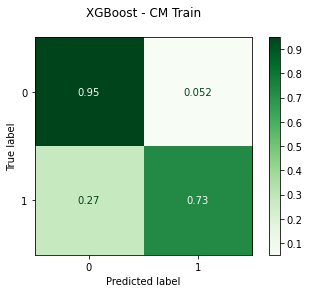

In [36]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('XGBoost - CM Train\n')

Text(0.5, 1.0, 'XGBoost - CM Valid\n')

<Figure size 432x288 with 0 Axes>

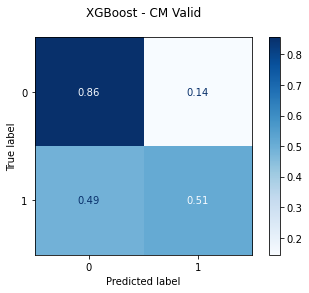

In [37]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('XGBoost - CM Valid\n')

Cargamos matriz de resultados

In [38]:
cla_results['XGBoost'] = [metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_val, y_valid_pred),
                                         metrics.precision_score(y_train, y_train_pred), metrics.precision_score(y_val, y_valid_pred),
                                         metrics.recall_score(y_train, y_train_pred), metrics.recall_score(y_val, y_valid_pred),
                                         metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_val, y_valid_pred)]      

Hay una gran diferencia entre el recall de train y de test. En validacion, estamos perdiendo el 49% de las etiquetas positivas.

## XGBoost - Grid Search

In [39]:
# Preproceso 1 para SGDRegressor - Default
scaler = MaxAbsScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = XGBClassifier(random_state= 0, use_label_encoder=False)

In [40]:
param_grid = {
    'cla__alpha' : [0.01, 0.42, 0.30],
    'cla__max_depth': [8, 16, 32],
    'cla__n_estimators': [5, 10, 15],
    'cla__booster':['gbtree', 'dart'],
    'cla__eval_metric': ['mlogloss']
}

In [41]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [42]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [43]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model = GridSearchCV(pipe, param_grid, scoring='f1', cv=5, verbose=1)

model.fit(X_train, y_train)
xgbc_cv = model

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [44]:
model.best_params_

{'cla__alpha': 0.42,
 'cla__booster': 'gbtree',
 'cla__eval_metric': 'mlogloss',
 'cla__max_depth': 8,
 'cla__n_estimators': 15}

In [45]:
# Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [46]:
# Evaluate train
text = "XGBoost (GSCV) - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

XGBoost (GSCV) - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4764
           1       0.81      0.75      0.78      2132

    accuracy                           0.87      6896
   macro avg       0.85      0.83      0.84      6896
weighted avg       0.87      0.87      0.87      6896



In [47]:
# Evaluate val
text = "XGBoost (GSCV) - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_val, y_val_pred))

XGBoost (GSCV) - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      2015
           1       0.70      0.62      0.66       941

    accuracy                           0.79      2956
   macro avg       0.77      0.75      0.76      2956
weighted avg       0.79      0.79      0.79      2956



Text(0.5, 1.0, 'XGBoost (GSCV) - CM Train\n')

<Figure size 432x288 with 0 Axes>

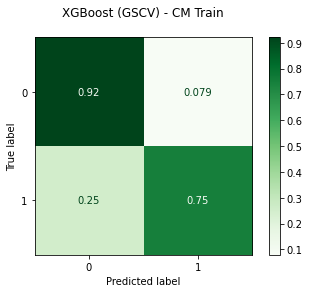

In [49]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('XGBoost (GSCV) - CM Train\n')

Text(0.5, 1.0, 'XGBoost (GSCV) - CM Valid\n')

<Figure size 432x288 with 0 Axes>

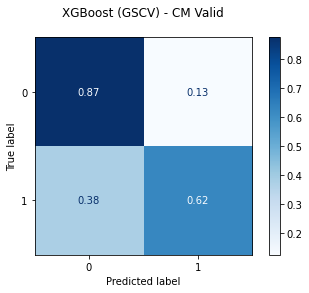

In [50]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('XGBoost (GSCV) - CM Valid\n')

Con GridSearch, el recall en validacion mejora, recuperando un 62% de las etiquetas positivas. El F1-Score tambien mejora. 

Cargamos matriz de resultados

In [51]:
cla_results['XGBoost - GCSV'] = [metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_val, y_val_pred),
                                         metrics.precision_score(y_train, y_train_pred), metrics.precision_score(y_val, y_val_pred),
                                         metrics.recall_score(y_train, y_train_pred), metrics.recall_score(y_val, y_val_pred),
                                         metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_val, y_val_pred)]  

## RandomForestClassifier - Default

In [52]:
# Preproceso 1 para SGDRegressor - Default
scaler = MinMaxScaler()
ft_selector = RandomForestClassifier(random_state=0)
model_ = RandomForestClassifier(random_state= 0, max_depth=20, min_samples_split=20)

In [53]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [54]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [55]:
# Fit
model = Pipeline([
  ('preprocessor', preprocessor),
  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model.fit(X_train, y_train)
rfc = model

In [56]:
# Predict
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [57]:
# Evaluate train
text = "RandomForestClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      4764
           1       0.88      0.81      0.84      2132

    accuracy                           0.91      6896
   macro avg       0.90      0.88      0.89      6896
weighted avg       0.90      0.91      0.90      6896



In [58]:
# Evaluate val
text = "RandomForestClassifier - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_val, y_valid_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      2015
           1       0.69      0.64      0.67       941

    accuracy                           0.79      2956
   macro avg       0.76      0.75      0.76      2956
weighted avg       0.79      0.79      0.79      2956



Text(0.5, 1.0, 'Random Forest - CM Train\n')

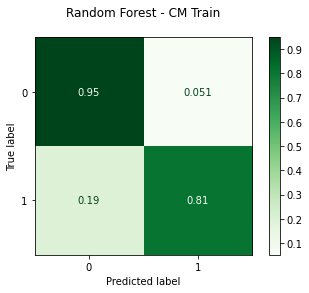

In [59]:
metrics.plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Random Forest - CM Train\n')

Text(0.5, 1.0, 'Random Forest - CM Valid\n')

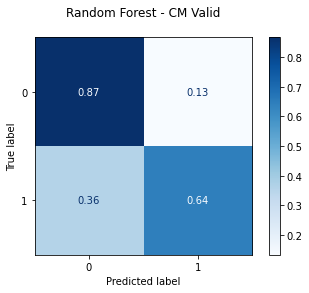

In [60]:
metrics.plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest - CM Valid\n')

RandomForest en Default se desempeña mejor que XGBoost con GridSearch. Tanto en recall como F1-Score

Cargamos matriz de resultados

In [61]:
cla_results['RandomForestClassifier'] = [metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_val, y_valid_pred),
                                         metrics.precision_score(y_train, y_train_pred), metrics.precision_score(y_val, y_valid_pred),
                                         metrics.recall_score(y_train, y_train_pred), metrics.recall_score(y_val, y_valid_pred),
                                         metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_val, y_valid_pred)]         

In [62]:
cla_results

,XGBoost,XGBoost - GCSV,RandomForestClassifier
Accuracy Train,0.879205,0.867749,0.905017
Accuracy Valid,0.746279,0.794655,0.794655
Precision Train,0.862242,0.809017,0.876210
Precision Valid,0.623545,0.698810,0.691076
Recall Train,0.725141,0.749062,0.806754
Recall Valid,0.512221,0.623804,0.641870
F1-score Train,0.787771,0.777886,0.840049
F1-score Valid,0.562427,0.659180,0.665565


## RandomForestClassifier - Grid Search

In [63]:
# Preproceso 1 para SGDRegressor - Default
scaler = MinMaxScaler()
#ft_selector = LinearSVR(random_state=0)
model_ = RandomForestClassifier(random_state= 0)

In [64]:
param_grid = {'cla__n_estimators' : [75, 100],
                'cla__criterion':['gini', 'entropy'],
                'cla__max_depth': [20, 25],
                'cla__min_samples_split': [20, 25],
                'cla__min_samples_leaf':[5, 6, 8],
                'cla__max_features':[0.5, 0.7, 0.8]}

In [65]:
# Train and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

#### Preproceso y ajuste

In [66]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

In [67]:
# Fit
pipe = Pipeline([
  ('preprocessor', preprocessor),
#  ('feature_selection', SelectFromModel(ft_selector)),
  ('cla', model_)
])

model = RandomizedSearchCV(pipe, param_grid, scoring='f1', cv=5, verbose=1)

model.fit(X_train, y_train)
rfc_cv = model

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [68]:
model.best_params_

{'cla__n_estimators': 100,
 'cla__min_samples_split': 20,
 'cla__min_samples_leaf': 5,
 'cla__max_features': 0.7,
 'cla__max_depth': 20,
 'cla__criterion': 'entropy'}

In [69]:
# Predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

#### Evaluacion de predicciones

In [70]:
# Evaluate train
text = "RandomForestClassifier - Reporte de clasificación del conjunto de train" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_train, y_train_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de train
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4764
           1       0.89      0.81      0.85      2132

    accuracy                           0.91      6896
   macro avg       0.90      0.88      0.89      6896
weighted avg       0.91      0.91      0.91      6896



In [71]:
# Evaluate val
text = "RandomForestClassifier - Reporte de clasificación del conjunto de validacion" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_val, y_val_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de validacion
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2015
           1       0.71      0.64      0.67       941

    accuracy                           0.80      2956
   macro avg       0.77      0.76      0.76      2956
weighted avg       0.80      0.80      0.80      2956



Text(0.5, 1.0, 'Random Forest (GSCV) - CM Train\n')

<Figure size 432x288 with 0 Axes>

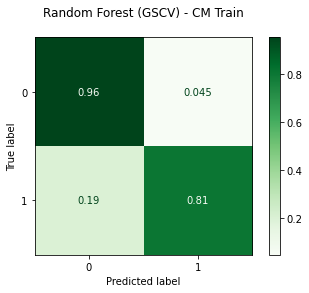

In [73]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_train, y_true=y_train,
                      normalize='true', cmap='Greens').ax_ \
                      .set_title('Random Forest (GSCV) - CM Train\n')

Text(0.5, 1.0, 'Random Forest (GSCV) - CM Valid\n')

<Figure size 432x288 with 0 Axes>

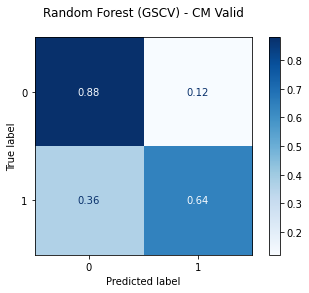

In [74]:
plt.figure()
metrics.plot_confusion_matrix(estimator= model, X=X_val, y_true=y_val,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest (GSCV) - CM Valid\n')

Si bien el modelo mejora, no es por mucho. El RandomizedSearch profundiza apenas el desempeño inicial sin ajuste de hiperparametros. Este es el mejor modelo para clasificacion. 

Cargamos matriz de resultados

In [75]:
cla_results['RandomForestClassifier - GSCV'] = [metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_val, y_val_pred),
                                         metrics.precision_score(y_train, y_train_pred), metrics.precision_score(y_val, y_val_pred),
                                         metrics.recall_score(y_train, y_train_pred), metrics.recall_score(y_val, y_val_pred),
                                         metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_val, y_val_pred)]         

In [76]:
cla_results

,XGBoost,XGBoost - GCSV,RandomForestClassifier,RandomForestClassifier - GSCV
Accuracy Train,0.879205,0.867749,0.905017,0.909223
Accuracy Valid,0.746279,0.794655,0.794655,0.801759
Precision Train,0.862242,0.809017,0.876210,0.890155
Precision Valid,0.623545,0.698810,0.691076,0.710558
Recall Train,0.725141,0.749062,0.806754,0.805816
Recall Valid,0.512221,0.623804,0.641870,0.636557
F1-score Train,0.787771,0.777886,0.840049,0.845889
F1-score Valid,0.562427,0.659180,0.665565,0.671525


## Evaluacion del mejor modelo en el conjunto de test

El mejor modelo de clasificación fue RandomForestClassifier con GCSV. Probamos este modelo con el conjunto de test

In [77]:
df_test = pd.read_parquet('df_supervisado_agrupado_test.parquet')

In [78]:
df_test['o_mes'] = df_test.anio_mes_cupon.astype('category').cat.codes

In [79]:
# fix para igualar la cantidad de columnas en test
df_test[[x for x in df.columns if x not in df_test.columns]] = 0

Repetimos el preprocesamiento para agregar la etiqueta a predecir

In [80]:
# Agregación de la nueva columna seteada en 0.
# En la iteración, se le cambia el valor a 1 en caso de que cumpla con las condiciones preestablecidas.

df_test['fg_aumentado'] = 0
for i in range(1,len(df_test)):
    if (df_test.iloc[i]['dni_titular_movimiento'] == df_test.iloc[i-1]['dni_titular_movimiento']) \
        & (df_test.iloc[i]['anio_mes_cupon'] > df_test.iloc[i-1]['anio_mes_cupon']):
            var_mes = df_test.iloc[i]['monto_ajustado'] - df_test.iloc[i-1]['monto_ajustado']
            if (var_mes > (abs(df_mes.iloc[i-1]['monto_ajustado'])*0.1)):
                df_test.loc[i,'fg_aumentado'] = 1

In [81]:
target_c = 'fg_aumentado'
ordinal_ft = 'dni_titular_movimiento'

In [82]:
# Features and target
X_test = df_test.drop([ordinal_ft, target_c, 'anio_mes_cupon'], axis=1)
y_test = df_test[target_c]

Veamos el balanceo de la etiqueta en el conjunto de test

In [83]:
y_test.value_counts()

0    1386
1     145
Name: fg_aumentado, dtype: int64

Como podemos ver, existen casi 10 veces menos etiquetas en 1 que en 0. Esto tiene un impacto sobre la metrica presicion para 1, ya que se hace mas dificil encontrar las etiquetas. 

In [84]:
num_features = [g for g in X_test.columns if 'client__x' not in g]
cat_features = [g for g in X_test.columns if 'client__x' in g]

In [85]:
len(X_test.columns) - len(num_features + cat_features) # Chequeo

0

In [86]:
# Preprocessing
num_transformer = scaler
cat_transformer = 'passthrough'

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)])

X_test_s = preprocessor.fit_transform(X_test)

In [87]:
y_pred = rfc_cv.predict(X_test)

In [88]:
# Evaluate test
text = "RandomForestClassifier - Reporte de clasificación del conjunto de test" 
print(len(text)*"=")
print(text)
print(len(text)*"=")
print(metrics.classification_report(y_test, y_pred))

RandomForestClassifier - Reporte de clasificación del conjunto de test
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      1386
           1       0.18      0.63      0.28       145

    accuracy                           0.70      1531
   macro avg       0.56      0.67      0.55      1531
weighted avg       0.88      0.70      0.76      1531



Ya en el reporte de clasificacion podemos ver que tenemos una presicion muy baja para la etiqueta 1. El conjunto de entrenamiento tiene una relacion de 2:1 en etiquetas, a diferencia del de prueba. Esto ultimo podria explicar porque el modelo intenta etiquetar muchas mas etiquetas positivas de las que hay.

Text(0.5, 1.0, 'Random Forest (GSCV) - CM Test\n')

<Figure size 432x288 with 0 Axes>

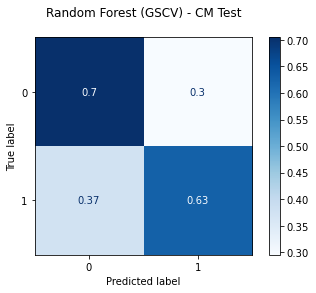

In [90]:
plt.figure()
metrics.plot_confusion_matrix(estimator= rfc_cv, X=X_test, y_true=y_test,
                      normalize='true', cmap='Blues').ax_ \
                      .set_title('Random Forest (GSCV) - CM Test\n')

El recall no es tan bajo, porque al predecir tantas etiquetas en 1, se recuperan muchas, pero con muy baja presicion.

Cargamos matriz de resultados

In [91]:
cla_results_test = pd.DataFrame(index=['Accuracy Train', 'Accuracy Test', 'Precision Train', 'Precision Test', 
                                  'Recall Train', 'Recall Test', 'F1-score Train', 'F1-score Test'])

In [92]:
# Esto funciona porque RandomForest GSCV es el ultimo modelo que se prueba
cla_results_test['RandomForestClassifier - GSCV'] = [metrics.accuracy_score(y_train, y_train_pred), metrics.accuracy_score(y_test, y_pred),
                                         metrics.precision_score(y_train, y_train_pred), metrics.precision_score(y_test, y_pred),
                                         metrics.recall_score(y_train, y_train_pred), metrics.recall_score(y_test, y_pred),
                                         metrics.f1_score(y_train, y_train_pred), metrics.f1_score(y_test, y_pred)]         

In [93]:
cla_results_test

,RandomForestClassifier - GSCV
Accuracy Train,0.909223
Accuracy Test,0.697583
Precision Train,0.890155
Precision Test,0.182000
Recall Train,0.805816
Recall Test,0.627586
F1-score Train,0.845889
F1-score Test,0.282171


In [94]:
cla_results

,XGBoost,XGBoost - GCSV,RandomForestClassifier,RandomForestClassifier - GSCV
Accuracy Train,0.879205,0.867749,0.905017,0.909223
Accuracy Valid,0.746279,0.794655,0.794655,0.801759
Precision Train,0.862242,0.809017,0.876210,0.890155
Precision Valid,0.623545,0.698810,0.691076,0.710558
Recall Train,0.725141,0.749062,0.806754,0.805816
Recall Valid,0.512221,0.623804,0.641870,0.636557
F1-score Train,0.787771,0.777886,0.840049,0.845889
F1-score Valid,0.562427,0.659180,0.665565,0.671525


En test, el f1-score queda cerca de 0.28, mucho mas bajo que en la prueba con el set de entrenamiento, donde en el conjunto de validacion se evalua un f1-score cercano a 0.68.

Pensamos que la gran diferencia en proporcion de las etiquetas en el conjunto de train y el de test podria haber contribuido al mal desempeño del modelo. Una explicacion para este desbalance puede deberse a que los meses de prueba no son temporada de consumos altos, diferente del conjunto de entrenamiento.

FIN

----